Import dependencies

In [393]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np

Import Excel workbooks using pandas

This function reads in the data from the file passed as parameter and concatenates it with the dataFrame passed in.

In [394]:
def read_file(dataFrame, input_file_path, race_code, year):
    try:
        temp_df = pd.read_excel (input_file_path, sheet_name = 'Type of Family', \
        names=['Characteristic','Value Type', 'All primary families', 'Married-couple families','Male householder, no spouse present', \
            'Female householder, no spouse present', 'Unrelated subfamilies'],\
        header=None,\
        skiprows=43,\
        index_col=None,\
        usecols="A,B,C:G")
        temp_df["Race"] = race_code
        temp_df["Year"] = year
        temp_df.fillna(method='ffill', inplace=True)
        frames = [dataFrame, temp_df]
        dataFrame = pd.concat(frames, ignore_index=True)
        temp_df["Characteristic"] = temp_df["Characteristic"].str.replace('\n','')
        temp_df["Value Type"]     = temp_df["Value Type"].str.replace('\n','')
    except:
        print("Error while trying to read in file ", input_file_path)
    finally:
        return(dataFrame)

In [395]:
try:
    del df
except NameError:
    pass

df = pd.DataFrame()
#----------------------------- 2019 ---------------------------------------------------------#
#2019 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_ALL_RACES.xlsx'),  "AL", 2019)
#2019 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_WHITE_ONLY.xlsx'), "WO", 2019)
#2019 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_BLACK_ONLY.xlsx'), "BO", 2019)
#2019 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_ASIAN_ONLY.xlsx'), "AO", 2019)
#2019 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_HISP_ONLY.xlsx'),  "HI", 2019)
#----------------------------- 2018 ---------------------------------------------------------#
#2018 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_ALL_RACES.xlsx'),  "AL", 2018)
#2018 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_WHITE_ONLY.xlsx'), "WO", 2018)
#2018 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_BLACK_ONLY.xlsx'), "BO", 2018)
#2018 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_ASIAN_ONLY.xlsx'), "AO", 2018)
#2018 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_HISP_ONLY.xlsx'),  "HI", 2018)

In [396]:
df = df[['Characteristic', 'Value Type', 'Race', 'Year', 'All primary families', 'Married-couple families',\
     'Male householder, no spouse present', 'Female householder, no spouse present', 'Unrelated subfamilies']]

In [397]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize='x-small')

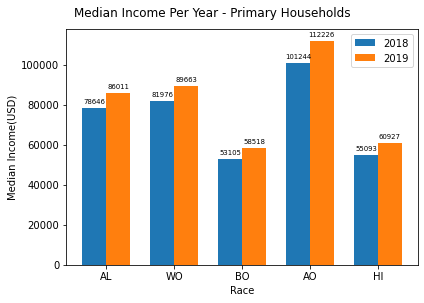

In [398]:
fig, ax = plt.subplots() 
fig.suptitle('Median Income Per Year - Primary Households', y=1.04)



temp_df = df[ (df["Characteristic"] == "Median income") & (df["Value Type"] == "Value (Dol.)")]
temp_df = temp_df[["Year","Race","All primary families"] ]

x = np.arange(len(labels))  # the label locations

x_values = temp_df[ temp_df["Year"] == 2018]["Race"]


med_inc_for_2018  = temp_df[ temp_df["Year"] == 2018]["All primary families"].astype(int)
med_inc_for_2019  = temp_df[ temp_df["Year"] == 2019]["All primary families"].astype(int)

width=0.35

ax.set_ylabel("Median Income(USD)")
ax.set_xlabel("Race")
ax.set_xticks(x)
ax.set_xticklabels(x_values)
rects1 = ax.bar(x - width/2, med_inc_for_2018, width = 0.35, label="2018")
rects2 = ax.bar(x + width/2, med_inc_for_2019, width = 0.35, label="2019")
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.show()